# Exploratory Data Analysis (EDA)
## Analyze resume documents and extract insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

C:\Users\kanch\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load extracted data
df = pd.read_csv('extracted_documents.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (53, 4)


,filename,category,text,text_length
0,P608-Dataset/Resumes_Docx/Peoplesoft Resume/Pe...,Peoplesoft,Anubhav Kumar Singh\t\t\n\n To work in a gl...,7256
1,P608-Dataset/Resumes_Docx/Peoplesoft Resume/Pe...,Peoplesoft,Murali\n\nExperience Summary \n\nI have 6 year...,3981
2,P608-Dataset/Resumes_Docx/Peoplesoft Resume/Pe...,Peoplesoft,\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...,3646
3,P608-Dataset/Resumes_Docx/Peoplesoft Resume/Pe...,Peoplesoft,PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...,7265
4,P608-Dataset/Resumes_Docx/Peoplesoft Resume/Pe...,Peoplesoft,PeopleSoft Administration\n \nVivekanand Sayan...,15339


## 1. Basic Statistics

In [3]:
# Dataset info
print("Dataset Information:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     53 non-null     object
 1   category     53 non-null     object
 2   text         53 non-null     object
 3   text_length  53 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ KB
None

Missing values:
filename       0
category       0
text           0
text_length    0
dtype: int64

Basic statistics:
        text_length
count     53.000000
mean    4015.377358
std     2379.930019
min      994.000000
25%     2621.000000
50%     3633.000000
75%     5089.000000
max    15339.000000


## 2. Category Distribution

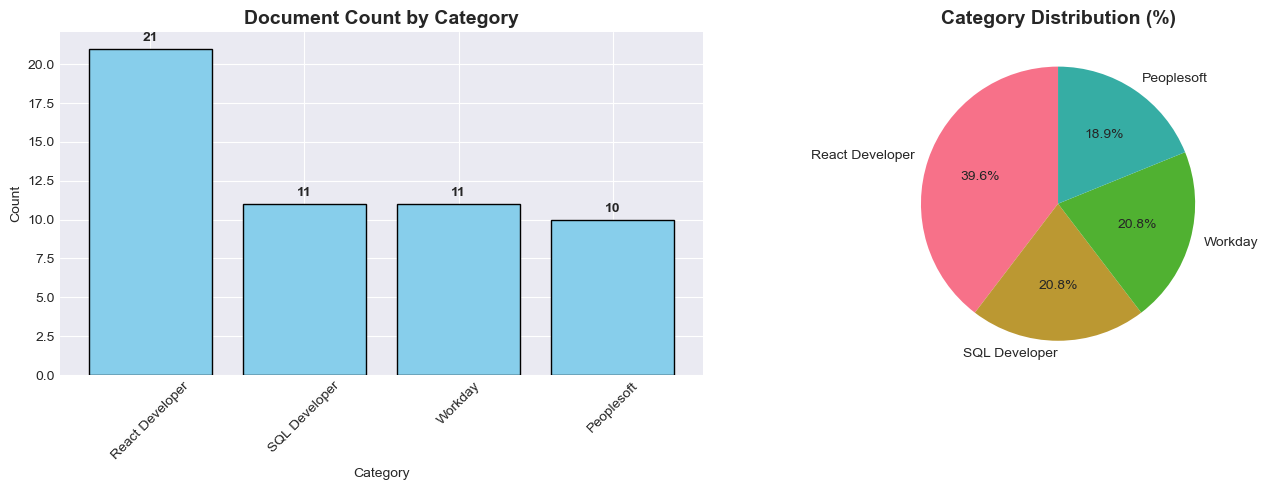


Category Distribution:
category
React Developer    21
SQL Developer      11
Workday            11
Peoplesoft         10
Name: count, dtype: int64


In [4]:
# Category distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
category_counts = df['category'].value_counts()
axes[0].bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Document Count by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(category_counts.values):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Category Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCategory Distribution:")
print(category_counts)

## 3. Text Length Analysis

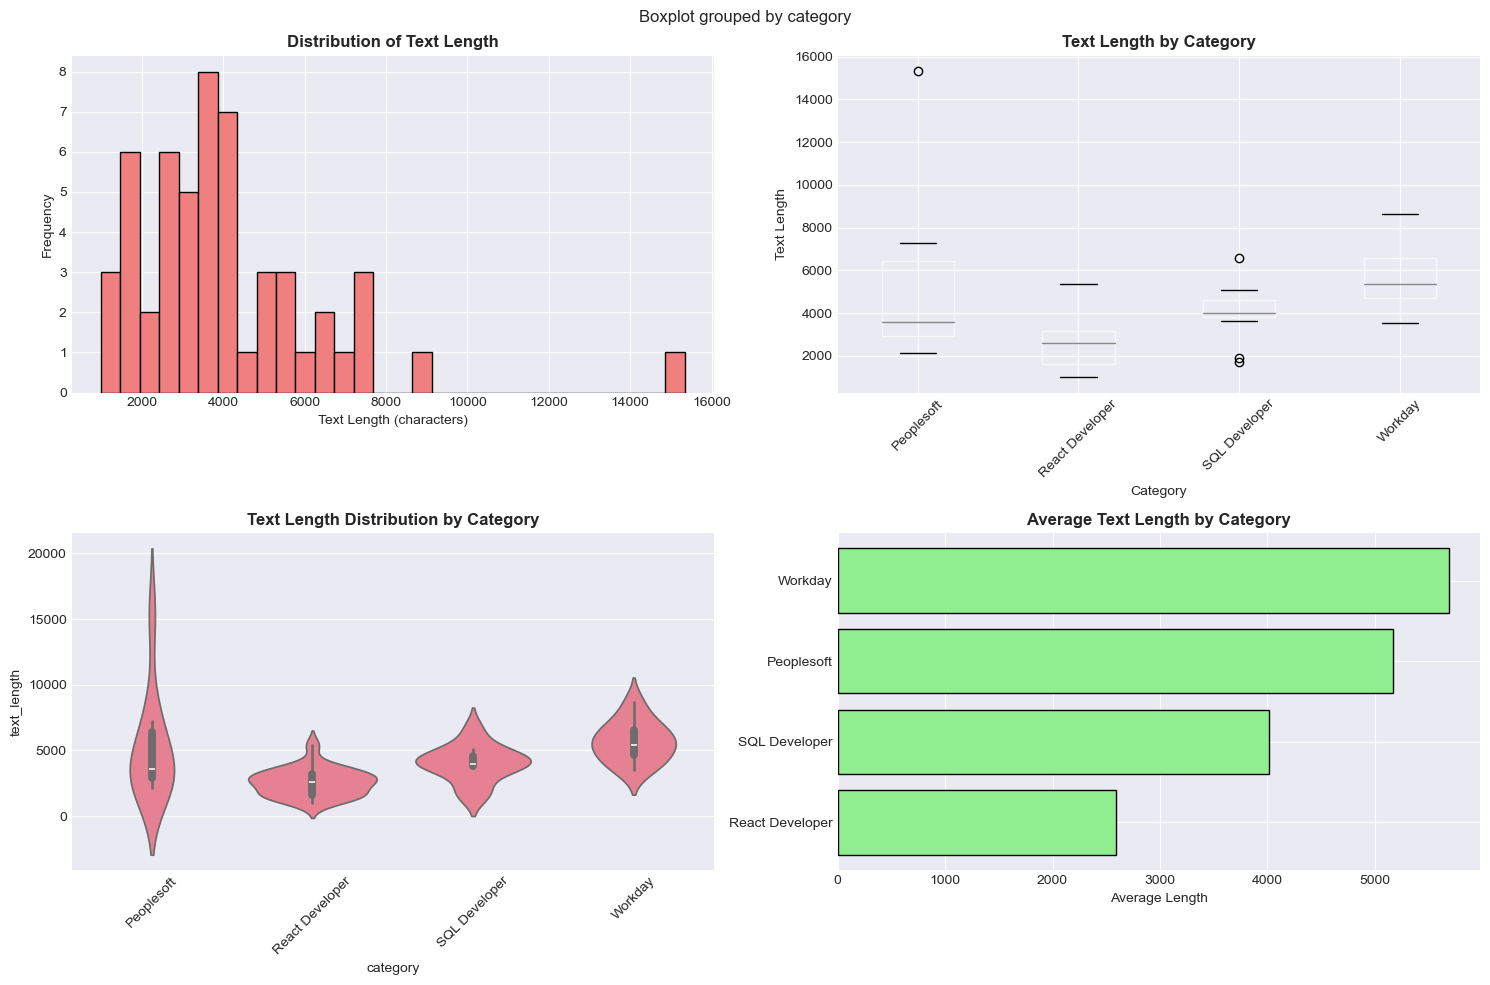


Text Length Statistics by Category:
                 count         mean          std     min     25%     50%  \
category                                                                   
Peoplesoft        10.0  5168.200000  4000.334369  2112.0  2927.5  3563.5   
React Developer   21.0  2588.809524  1040.390581   994.0  1625.0  2621.0   
SQL Developer     11.0  4013.272727  1358.393028  1693.0  3805.0  3999.0   
Workday           11.0  5692.909091  1530.507593  3533.0  4689.0  5381.0   

                     75%      max  
category                           
Peoplesoft       6437.25  15339.0  
React Developer  3172.00   5383.0  
SQL Developer    4601.50   6579.0  
Workday          6554.50   8655.0  


In [5]:
# Text length statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of text length
axes[0, 0].hist(df['text_length'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 0].set_title('Distribution of Text Length', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Text Length (characters)')
axes[0, 0].set_ylabel('Frequency')

# Box plot by category
df.boxplot(column='text_length', by='category', ax=axes[0, 1])
axes[0, 1].set_title('Text Length by Category', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Text Length')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Violin plot
sns.violinplot(data=df, x='category', y='text_length', ax=axes[1, 0])
axes[1, 0].set_title('Text Length Distribution by Category', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Average text length by category
avg_length = df.groupby('category')['text_length'].mean().sort_values()
axes[1, 1].barh(avg_length.index, avg_length.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Average Text Length by Category', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Length')

plt.tight_layout()
plt.savefig('text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nText Length Statistics by Category:")
print(df.groupby('category')['text_length'].describe())

## 4. Word Cloud Analysis

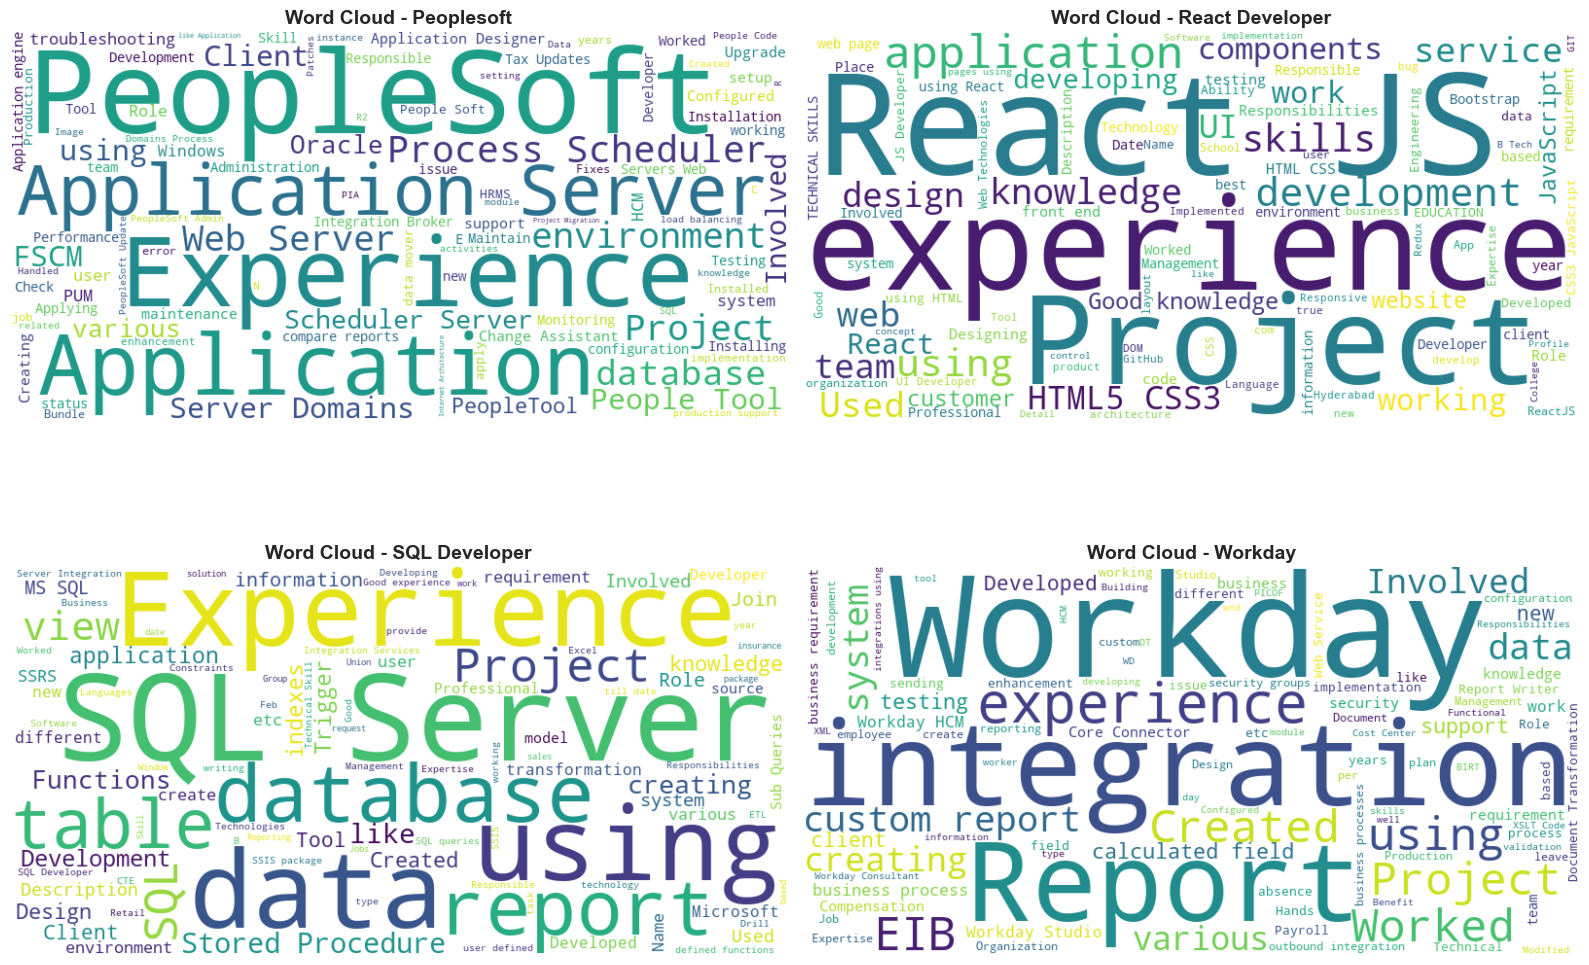

In [6]:
# Generate word clouds for each category
categories = df['category'].unique()
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

stop_words = set(stopwords.words('english'))

for idx, category in enumerate(categories):
    if idx >= 4:
        break
    
    text = ' '.join(df[df['category'] == category]['text'].values)
    
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         stopwords=stop_words,
                         max_words=100,
                         colormap='viridis').generate(text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'Word Cloud - {category}', fontsize=14, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Top Keywords by Category

In [7]:
def extract_keywords(text, top_n=20):
    """Extract top keywords from text"""
    # Clean and tokenize
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    keywords = [word for word in tokens if word not in stop_words and len(word) > 3]
    
    # Count frequency
    word_freq = Counter(keywords)
    return word_freq.most_common(top_n)

# Extract top keywords for each category
for category in df['category'].unique():
    print(f"\n{'='*60}")
    print(f"Top 15 Keywords for {category}:")
    print('='*60)
    
    category_text = ' '.join(df[df['category'] == category]['text'].values)
    keywords = extract_keywords(category_text, top_n=15)
    
    for i, (word, freq) in enumerate(keywords, 1):
        print(f"{i:2d}. {word:20s} - {freq:5d} occurrences")


Top 15 Keywords for Peoplesoft:
 1. peoplesoft           -   141 occurrences
 2. application          -   120 occurrences
 3. servers              -    80 occurrences
 4. server               -    79 occurrences
 5. experience           -    78 occurrences
 6. people               -    60 occurrences
 7. process              -    58 occurrences
 8. domains              -    49 occurrences
 9. scheduler            -    47 occurrences
10. project              -    43 occurrences
11. tools                -    41 occurrences
12. support              -    38 occurrences
13. oracle               -    38 occurrences
14. database             -    37 occurrences
15. using                -    37 occurrences

Top 15 Keywords for React Developer:
 1. react                -    98 occurrences
 2. experience           -    74 occurrences
 3. using                -    72 occurrences
 4. html                 -    62 occurrences
 5. knowledge            -    52 occurrences
 6. project              -   

## 6. Feature Extraction for Keywords


Feature Statistics:
       has_objective  has_summary  has_skills  has_experience  has_education  \
count      53.000000    53.000000   53.000000       53.000000      53.000000   
mean        0.320755     0.641509    0.830189        0.962264       0.735849   
std         0.471233     0.484146    0.379060        0.192380       0.445099   
min         0.000000     0.000000    0.000000        0.000000       0.000000   
25%         0.000000     0.000000    1.000000        1.000000       0.000000   
50%         0.000000     1.000000    1.000000        1.000000       1.000000   
75%         1.000000     1.000000    1.000000        1.000000       1.000000   
max         1.000000     1.000000    1.000000        1.000000       1.000000   

       has_projects  has_certifications  has_awards   word_count    char_count  
count     53.000000           53.000000   53.000000    53.000000     53.000000  
mean       0.943396            0.188679    0.207547   539.962264   4015.377358  
std        0.23

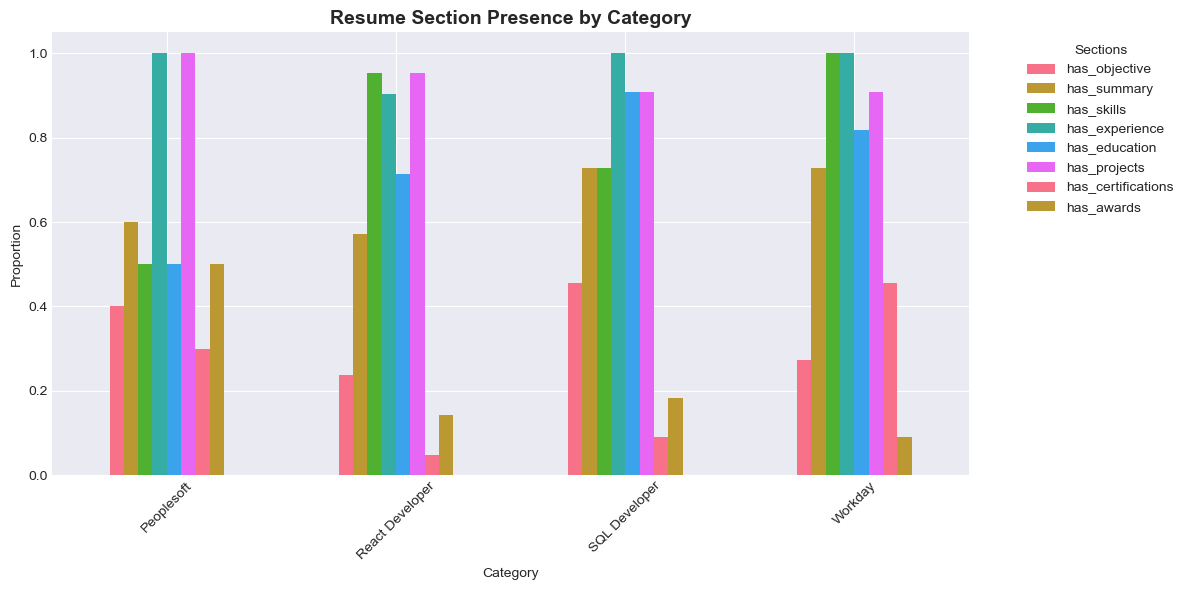

In [8]:
# Extract common resume sections
def extract_features(text):
    """Extract features from resume text"""
    text_lower = text.lower()
    
    features = {
        'has_objective': int(any(word in text_lower for word in ['objective', 'career objective', 'professional objective'])),
        'has_summary': int(any(word in text_lower for word in ['summary', 'profile summary', 'career profile'])),
        'has_skills': int(any(word in text_lower for word in ['skills', 'technical skills', 'core competencies'])),
        'has_experience': int(any(word in text_lower for word in ['experience', 'work experience', 'professional experience'])),
        'has_education': int(any(word in text_lower for word in ['education', 'academic', 'qualification'])),
        'has_projects': int('project' in text_lower),
        'has_certifications': int(any(word in text_lower for word in ['certification', 'training'])),
        'has_awards': int(any(word in text_lower for word in ['award', 'achievement'])),
        'word_count': len(text.split()),
        'char_count': len(text)
    }
    
    return features

# Apply feature extraction
features_df = df['text'].apply(extract_features).apply(pd.Series)
df_with_features = pd.concat([df, features_df], axis=1)

print("\nFeature Statistics:")
print(features_df.describe())

# Visualize features by category
feature_cols = ['has_objective', 'has_summary', 'has_skills', 'has_experience', 
                'has_education', 'has_projects', 'has_certifications', 'has_awards']

fig, ax = plt.subplots(figsize=(12, 6))
df_with_features.groupby('category')[feature_cols].mean().plot(kind='bar', ax=ax)
ax.set_title('Resume Section Presence by Category', fontsize=14, fontweight='bold')
ax.set_ylabel('Proportion')
ax.set_xlabel('Category')
ax.legend(title='Sections', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('resume_sections.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Save Processed Data

In [9]:
# Save data with features
df_with_features.to_csv('processed_documents.csv', index=False)
print("Processed data saved to processed_documents.csv")

# Summary report
print("\n" + "="*60)
print("EDA SUMMARY REPORT")
print("="*60)
print(f"Total Documents: {len(df)}")
print(f"Number of Categories: {df['category'].nunique()}")
print(f"\nCategory Distribution:")
for cat, count in df['category'].value_counts().items():
    print(f"  {cat}: {count} ({count/len(df)*100:.1f}%)")
print(f"\nAverage Text Length: {df['text_length'].mean():.0f} characters")
print(f"Average Word Count: {df_with_features['word_count'].mean():.0f} words")
print("="*60)

Processed data saved to processed_documents.csv

EDA SUMMARY REPORT
Total Documents: 53
Number of Categories: 4

Category Distribution:
  React Developer: 21 (39.6%)
  SQL Developer: 11 (20.8%)
  Workday: 11 (20.8%)
  Peoplesoft: 10 (18.9%)

Average Text Length: 4015 characters
Average Word Count: 540 words
